# Statistical Inference - Part 1

We will review about
- Population statistics estimation with sample
- Central Limit Theorem
- Confidence Interval (CI) and Confidence Level (CL)


with an example population distribution.

Those concepts are foundational but often misinterpreted, so it's nice to review them throughly.

## Population distribution
Throughout the explanation, we will use a binomial distribution, $Binom(n=100,p=0.1)$, as the population distribution

- Notation
    - $\mu$: Population mean, $np=10$
    - $\sigma$: Population standard deviation, $\sqrt{np(1-p)}=3$

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Population: Binomial(n=100, p=0.1)
# Each draw is a count of successes out of 100 trials.
N_TRIALS = 100
P_SUCCESS = 0.1

# Population parameters (fixed, usually unknown in practice)
mu = N_TRIALS * P_SUCCESS
sigma2 = N_TRIALS * P_SUCCESS * (1 - P_SUCCESS)
sigma = sigma2 ** 0.5
print("Population mean (mu):", mu)
print("Population standard deviation (sigma):", sigma)

Population mean (mu): 10.0
Population standard deviation (sigma): 3.0


## Sample mean and deviation as estimators of population statistics

For sample size $n$,

- **Sample mean** $\bar{X}$
    - $\bar{X} = (X_1 + X_2 + ... + X_n)/n$
    - The population mean $\mu$ estimator
- **Sample standard deviation** $s$
    - $s = \sqrt{\frac{(X_1-\bar{X})^2+(X_2-\bar{X})^2+ ... + (X_m-\bar{X})^2}{n-1}}$
    - The population standard deviation $\sigma$ estimator

In [2]:
# Take one sample of size n from the population
n = 30
sample = np.random.binomial(n=N_TRIALS, p=P_SUCCESS, size=n)

# Population statistics estimators
sample_mean = np.mean(sample)
sample_standard_deviation = (np.var(sample) * n / (n - 1)) ** 0.5

# Compare the population and estimators
print("Population mean (mu):", mu, "Sample mean:", sample_mean)
print("Population standard deviation (sigma):", sigma, "Sample standard deviation:", sample_standard_deviation)


Population mean (mu): 10.0 Sample mean: 10.433333333333334
Population standard deviation (sigma): 3.0 Sample standard deviation: 3.480817713414908


## Central Limit Theorem (CLT)

CLT says:

- For a sufficently large sample size $n$, the distribution of the sample mean follows normal distribution, close to $N(\mu, \frac{\sigma}{\sqrt{n}})$, regardless of the population distribution shape.


- Assumption: For every sample $X1, X2, ..., Xn$,
    - $X_i$ is sampled independently to each other 
        - $X_i$ is randomly sampled with replacement (sampling without replacement makes them dependent by affecting to the next one)
    - All $X_i$ are from the same population distribution

## Confidence Interval (CI) and Confidence Level (CL)

Let's say a CI is calculated for 95\% CL.
The common misinterpretation of this meaning is that "The probability that the population mean is within this CI is 95\%". This is incorrect interpretation. The right interpretation is that **"If we repeat samplings from the poppulation 100 times, 95 samples have CI that includes the population mean".**


To clarify, here is demonstration of the ideas of CLT, CI, and CL.

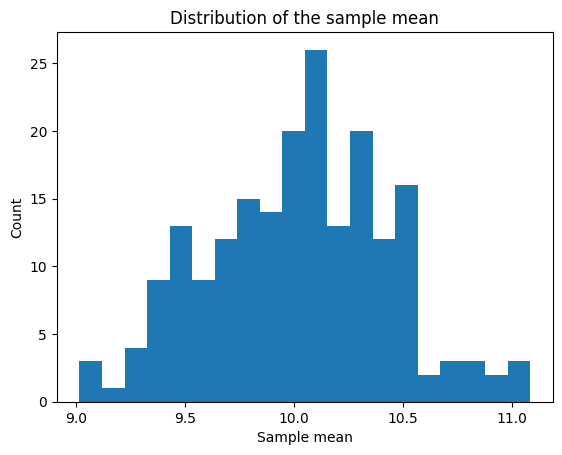

Mean of sample means: 10.020083333333334 (true mu: 10.0 )
Variance of sample means: 0.1715286041666667 (sigma^2 / sample_size: 0.15 )
Proportion of 95% CIs containing mu: 0.935


In [3]:
# central limit theorem simulation
sample_size = 60  # number of observations per sample, choose large enough number
num_samples = 200 # number of repeated samplings

# confidence level assumed 95%
confidence_level = 0.95
alpha = 1 - confidence_level
z_score = stats.norm.ppf(1 - alpha / 2) # two sided z-score for 95% CI

# store each sample statistics
sample_means = []
sample_standard_deviations = []
population_mean_in_sample_ci = []

for i in range(num_samples):
    # sample with replacement from population (via binomial draws)
    sample = np.random.binomial(n=N_TRIALS, p=P_SUCCESS, size=sample_size)

    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

    sample_standard_deviation = (np.var(sample) * sample_size / (sample_size - 1)) ** 0.5
    sample_standard_deviations.append(sample_standard_deviation)

    # confidence interval
    se = sample_standard_deviation / sample_size ** 0.5
    lower_bound = sample_mean - z_score * se
    upper_bound = sample_mean + z_score * se    
    population_mean_in_sample_ci.append(lower_bound <= mu <= upper_bound)

plt.hist(sample_means, bins=20)
plt.xlabel("Sample mean")
plt.ylabel("Count")
plt.title("Distribution of the sample mean")
plt.show()

sample_mean_of_means = np.mean(sample_means)
sample_mean_var = np.var(sample_means)

print("Mean of sample means:", sample_mean_of_means, "(true mu:", mu, ")")
print(
    "Variance of sample means:", sample_mean_var, 
    "(sigma^2 / sample_size:", sigma2 / sample_size, ")"
)
print("Proportion of 95% CIs containing mu:", np.mean(population_mean_in_sample_ci))
